**[Machine Learning Home Page](https://www.kaggle.com/learn/intro-to-machine-learning)**

---


# Introduction
Machine learning competitions are a great way to improve your data science skills and measure your progress. 

In this exercise, you will create and submit predictions for a Kaggle competition. You can then improve your model (e.g. by adding features) to improve and see how you stack up to others taking this micro-course.

The steps in this notebook are:
1. Build a Random Forest model with all of your data (**X** and **y**)
2. Read in the "test" data, which doesn't include values for the target.  Predict home values in the test data with your Random Forest model.
3. Submit those predictions to the competition and see your score.
4. Optionally, come back to see if you can improve your model by adding features or changing your model. Then you can resubmit to see how that stacks up on the competition leaderboard.

## Recap
Here's the code you've written so far. Start by running it again.

In [1]:
# Code you have previously used to load data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Set up code checking
# import os
# if not os.path.exists('N:/Kaggle/Kickstarter Projects/Data/ks-projects-201801.csv'):
#     os.symlink("../input/home-data-for-ml-course/train.csv", "../input/train.csv")  
#     os.symlink("../input/home-data-for-ml-course/test.csv", "../input/test.csv") 


# Path of the file to read. We changed the directory structure to simplify submitting to a competition
iowa_file_path = 'E:/Kaggle/Housing Prices Competitio/Data/iowa-house-prices/train.csv'

In [3]:
home_data = pd.read_csv(iowa_file_path)
print(home_data.columns)
# Create target object and call it y
y = home_data['SalePrice']
# y = np.log1p(home_data['SalePrice'])
# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]
# print(X.dtypes)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:


# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Specify Model
iowa_model = DecisionTreeRegressor(random_state=1)
# Fit Model
iowa_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

# Using best value for max_leaf_nodes
iowa_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
iowa_model.fit(train_X, train_y)
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE when not specifying max_leaf_nodes: 29,653
Validation MAE for best value of max_leaf_nodes: 27,283
Validation MAE for Random Forest Model: 22,762


C:\Users\richa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Creating a Model For the Competition

Build a Random Forest model and train it on all of **X** and **y**.

In [5]:
# To improve accuracy, create a new Random Forest model which you will train on all training data
rf_model_on_full_data = RandomForestRegressor(n_estimators = 400, random_state=1)

In [6]:
X_full = home_data.copy()
num_features = list()
cat_features = list()
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

for col in X_full.columns:
    if(X_full[col].dtype in numeric_dtypes):
        num_features.append(col)
    else:
        cat_features.append(col)
print(cat_features)
print(num_features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '

In [7]:
home_data_num = home_data[num_features]
total_missing = home_data_num.isnull().sum()
percent_missing = total_missing / home_data_num.shape[0]
print(total_missing.head())
total_missing = total_missing.sort_values(ascending=False)
percent_missing = percent_missing.sort_values(ascending=False)
total = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
print(total.head(20))

Id               0
MSSubClass       0
LotFrontage    259
LotArea          0
OverallQual      0
dtype: int64
              Total   Percent
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
MasVnrArea        8  0.005479
BsmtFinSF1        0  0.000000
LowQualFinSF      0  0.000000
2ndFlrSF          0  0.000000
1stFlrSF          0  0.000000
TotalBsmtSF       0  0.000000
BsmtUnfSF         0  0.000000
BsmtFinSF2        0  0.000000
SalePrice         0  0.000000
BsmtFullBath      0  0.000000
YearRemodAdd      0  0.000000
YearBuilt         0  0.000000
OverallCond       0  0.000000
OverallQual       0  0.000000
LotArea           0  0.000000
MSSubClass        0  0.000000
GrLivArea         0  0.000000
BsmtHalfBath      0  0.000000


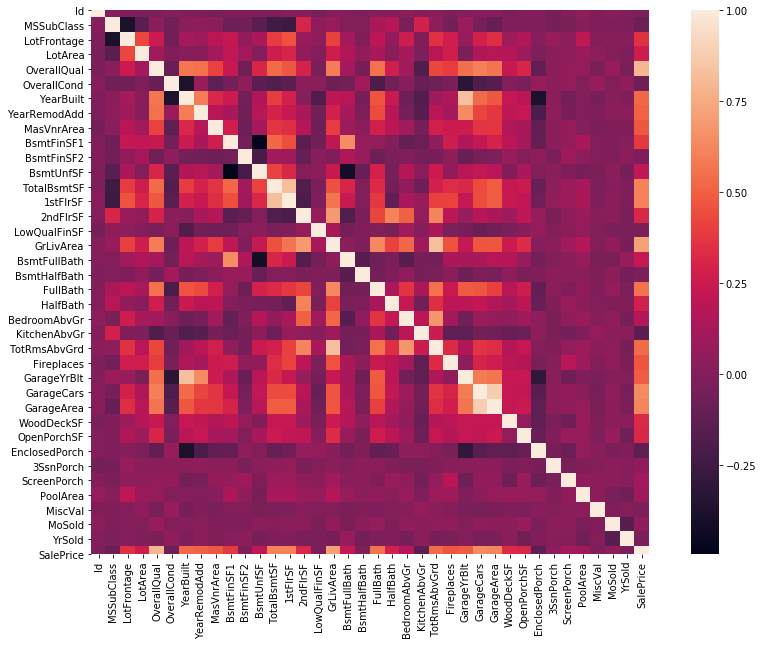

In [8]:
cor_mat = home_data_num.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat, square=True, vmax=1)

In [9]:
home_data_num = home_data_num.drop(total[total['Total']>1].index, 1)
# home_data_num = home_data_num.drop(home_data_num.loc[home_data_num['Electrical'].isnull()].index)
print(home_data_num.isnull().sum().max())

0


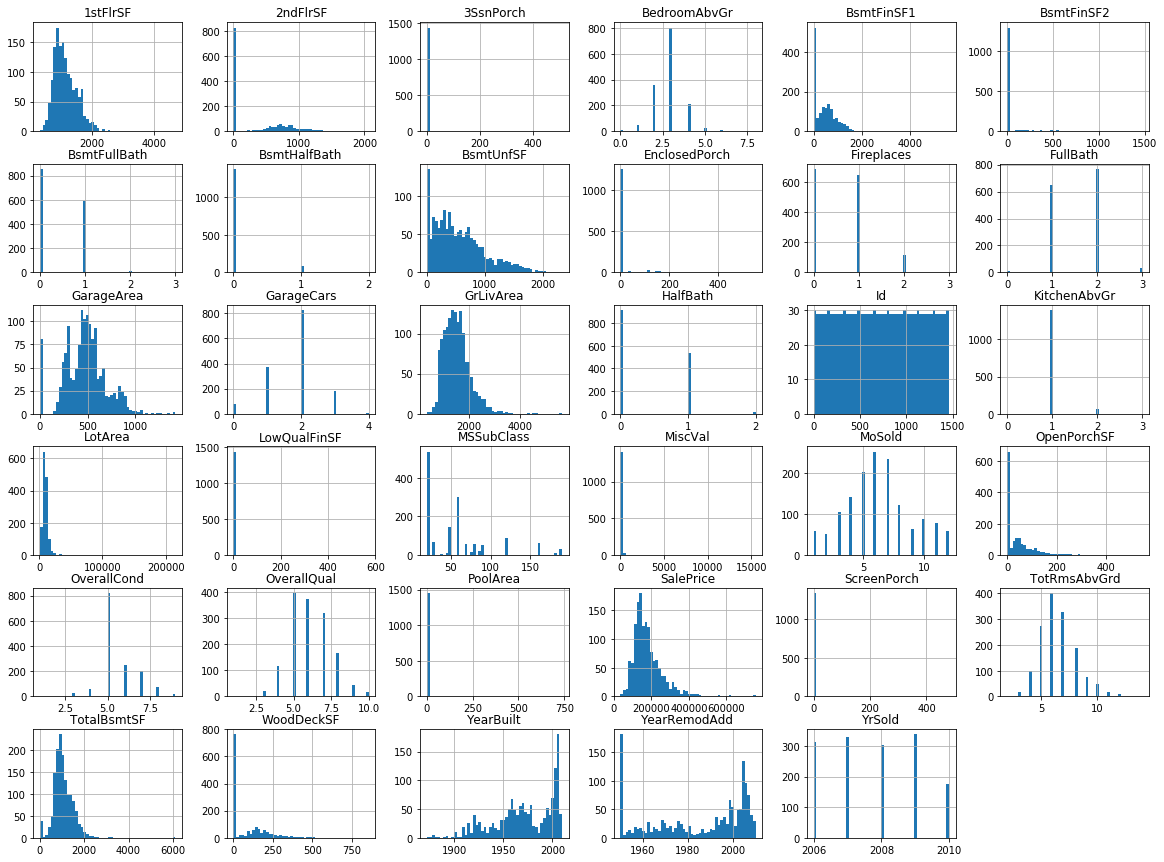

In [10]:
home_data_num.hist(bins=50, figsize=(20,15))
plt.show()

Outliers

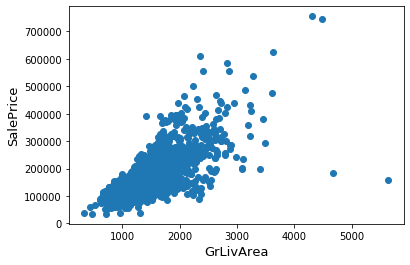

In [11]:
fig, ax = plt.subplots()
ax.scatter(x=home_data_num['GrLivArea'], y=home_data_num['SalePrice'])
plt.ylabel("SalePrice", fontsize=13)
plt.xlabel("GrLivArea", fontsize=13)
plt.show()

In [12]:
train = home_data_num.drop(home_data_num[(home_data_num['GrLivArea']>4000) 
                                         & (home_data_num['SalePrice']<300000)].index)

In [13]:
# fit rf_model_on_full_data on all data from the training data
X_full = home_data_num.drop(['Id', 'KitchenAbvGr', 'EnclosedPorch', 'SalePrice'], axis=1)
train_features = X_full.columns
print(X_full.shape)
train_X, val_X, train_y, val_y = train_test_split(X_full, y, random_state=1)
print(train_X.shape)

(1460, 31)
(1095, 31)


In [14]:
# fit rf_model_on_full_data on all data from the training data
rf_model_on_full_data.fit(train_X, train_y)
rf_model_on_full_data_prediction = rf_model_on_full_data.predict(val_X)
rf_model_on_full_data_mae = mean_absolute_error(rf_model_on_full_data_prediction, val_y)

print("Validation MAE for Random Forest Model on full data: {:,.0f}".format(rf_model_on_full_data_mae))

Validation MAE for Random Forest Model on full data: 16,592


# Make Predictions
Read the file of "test" data. And apply your model to make predictions

In [15]:
# path to file you will use for predictions
test_data_path = 'E:/Kaggle/Housing Prices Competitio/Data/iowa-house-prices/test.csv'

# read test data file using pandas
test_data = pd.read_csv(test_data_path)


# create test_X which comes from test_data but includes only the columns you used for prediction.
# The list of columns is stored in a variable called features
# del num_features[-1]
test_X = test_data[train_features]


# make predictions which we will submit. 
# test_preds = ____

# The lines below shows how to save predictions in format used for competition scoring
# Just uncomment them.

#output = pd.DataFrame({'Id': test_data.Id,
#                       'SalePrice': test_preds})
#output.to_csv('submission.csv', index=False)

Before submitting, run a check to make sure your `test_preds` have the right format.

In [16]:
# step_1.check()
# step_1.solution()

# Test Your Work

To test your results, you'll need to join the competition (if you haven't already).  So open a new window by clicking on [this link](https://www.kaggle.com/c/home-data-for-ml-course).  Then click on the **Join Competition** button.

![join competition image](https://i.imgur.com/wLmFtH3.png)

Next, follow the instructions below:
1. Begin by clicking on the blue **COMMIT** button in the top right corner of this window.  This will generate a pop-up window.  
2. After your code has finished running, click on the blue **Open Version** button in the top right of the pop-up window.  This brings you into view mode of the same page. You will need to scroll down to get back to these instructions.
3. Click on the **Output** tab on the left of the screen.  Then, click on the **Submit to Competition** button to submit your results to the leaderboard.

You have now successfully submitted to the competition!

4. If you want to keep working to improve your performance, select the blue **Edit** button in the top right of the screen. Then you can change your model and repeat the process. There's a lot of room to improve your model, and you will climb up the leaderboard as you work.

# Continuing Your Progress
There are many ways to improve your model, and **experimenting is a great way to learn at this point.**

The best way to improve your model is to add features.  Look at the list of columns and think about what might affect home prices.  Some features will cause errors because of issues like missing values or non-numeric data types. 

The **[Intermediate Machine Learning](https://www.kaggle.com/learn/intermediate-machine-learning)** micro-course will teach you how to handle these types of features. You will also learn to use **xgboost**, a technique giving even better accuracy than Random Forest.


# Other Micro-Courses
The **[Pandas](https://kaggle.com/Learn/Pandas)** micro-course will give you the data manipulation skills to quickly go from conceptual idea to implementation in your data science projects. 

You are also ready for the **[Deep Learning](https://kaggle.com/Learn/Deep-Learning)** micro-course, where you will build models with better-than-human level performance at computer vision tasks.

---
**[Machine Learning Home Page](https://www.kaggle.com/learn/intro-to-machine-learning)**





*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum) to chat with other Learners.*